## Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# External imports
import numpy as np
import cPickle as pickle
import pandas as pd
import matplotlib.pyplot as plt
# Internal imports
import utils
import okcupidio
import linearRegression
import kmeans
import pca
import gaussianModel
import RBFkernel
import sgd
import linearRBF
from linearBinaryClassifier import LinearBinaryClassifier
from linearRandom import LinearRandom
from randomMap import RandomMap

## Make feature arrays using imputation

In [116]:
# LOAD FEATURES
savename = 'features.p'
features, featureNames = pickle.load(open(savename, 'r'))

In [117]:
# Settings
labelsColumn = 'sex_m'
dropData = ['last_online']
minResponseRate = 0.35
nTest = 10000

In [118]:
# Load data
rawDF = pd.DataFrame(data=features, columns=featureNames)

# drop unwanted data
for drop in dropData:
    
    if drop in rawDF.columns:
        print 'dropping', drop
        rawDF.drop(drop, 1, inplace=True)
    
# Ignore data with response rates too low
# columns = df.columns[df.columns != labelsColumn]
columns = rawDF.columns
for col in columns:
    
    if rawDF[col].notnull().mean() < minResponseRate:
        
        rawDF.drop(col, 1, inplace=True)
        
df = rawDF.copy()

dropping last_online


In [119]:
# Now remove people without reported values in the labels Column
df = rawDF.copy()
df = df[df[labelsColumn].notnull()]
# Ignore entries where stddev == 0
columns = df.columns[df.columns != labelsColumn]
for col in columns:
    if df[col].std() == 0:
        df.drop(col, 1, inplace=True)

## Imputation using linear regression

In [167]:
# Initialize imputed data
dfImputed = df.copy()
# Fill nan's with means
for col in dfImputed.columns:
    series = dfImputed[col]
    if series.isnull().any():
        series[series.isnull()] = series.notnull().mean()
        dfImputed[col] = series
        
missingCols = dfImputed.columns[df.isnull().any()]

likes_cats
sign_leo


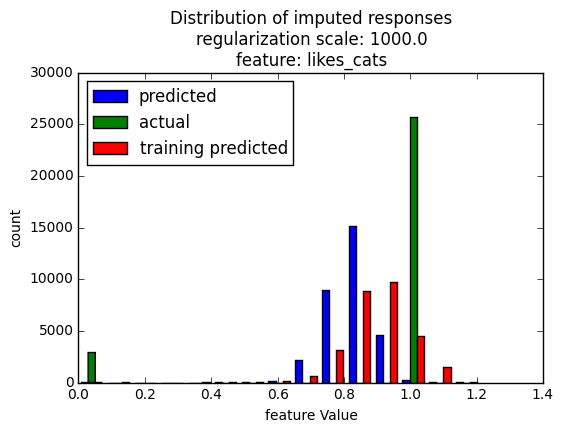

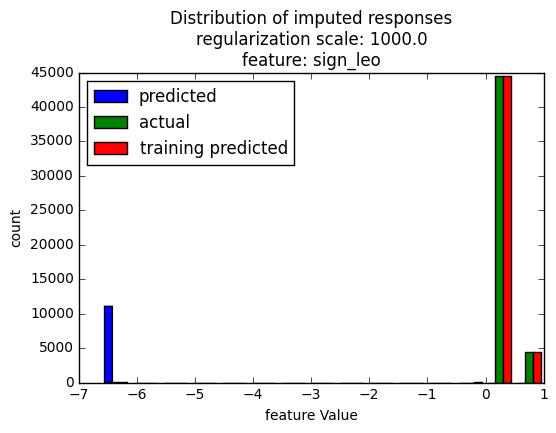

In [185]:
# Perform imputation
# for i in range(len(missingCols)):
# for i in (67, ):
for col in ('likes_cats', 'sign_leo'):
    print col
    # Split into x and y data frames
#     col = missingCols[i]
    dfx = dfImputed.drop(col, 1)
    dfy = dfImputed[col]
    # Select data points with defined y
    mask = df[col].notnull()
    x = dfx[mask].values
    y = utils.columnVector(dfy[mask].values)
    # Perform regression
    regScale = 1e3
    lr = linearRegression.BinaryLinearRegression(regScale=regScale, classify=False)
    lr.fit(x, y)
    # Predict missing values
    x1 = dfx[~mask].values
    ypred = lr.ypred(x1)
    # Update imputed data frame
#     dfImputed[col][~mask] = ypred
    
    plt.figure()
    ypred0 = lr.ypred(x)
    plt.hist([ypred, y, ypred0], 15);
    plt.title('Distribution of imputed responses\nregularization scale: {0} \n' \
              'feature: {1}'.format(regScale, col))
    plt.ylabel('count')
    plt.xlabel('feature Value')
    plt.legend(['predicted', 'actual', 'training predicted'], loc='best')
    plt.savefig('figures/imputed_dist_{0}.pdf'.format(col))

In [173]:
for i, col in enumerate(missingCols):
    print i, col

0 sign_aquarius
1 sign_aries
2 sign_cancer
3 sign_capricorn
4 sign_gemini
5 sign_leo
6 sign_libra
7 sign_pisces
8 sign_sagittarius
9 sign_scorpio
10 sign_taurus
11 sign_virgo
12 height
13 body_type_a little extra
14 body_type_athletic
15 body_type_average
16 body_type_curvy
17 body_type_fit
18 body_type_full figured
19 body_type_jacked
20 body_type_overweight
21 body_type_rather not say
22 body_type_skinny
23 body_type_thin
24 body_type_used up
25 education_college/university
26 education_dropped out of college/university
27 education_dropped out of high school
28 education_dropped out of law school
29 education_dropped out of masters program
30 education_dropped out of med school
31 education_dropped out of ph.d program
32 education_dropped out of space camp
33 education_dropped out of two-year college
34 education_graduated from college/university
35 education_graduated from high school
36 education_graduated from law school
37 education_graduated from masters program
38 education_gr